<a href="https://colab.research.google.com/github/haribabugitwork/ANNandDL/blob/main/ConvNets_HariBabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 7.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=5e052d1bdb8c7c39c4072f7c40a6ecde43409656e781f639a0f5a682319ff372
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
#Importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from skimage import color

import tensorflow as tf
import tflearn.datasets.oxflower17 as oxflower17 # Importing dataset

from PIL import Image , ImageFilter # Image handling Library
import cv2 # Image handling Library

In [ ]:
tf.__version__ #Checking tensorflow version

'2.8.2'

In [ ]:
X,y = oxflower17.load_data(one_hot= False) #Loading dataset

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
X.shape, y.shape

((1360, 224, 224, 3), (1360,))

In [ ]:
print("Image size : ", X[0].shape)

Image size :  (224, 224, 3)


In [ ]:
y.size

1360

In [ ]:
values =[]
labels=[]
for label in set(y):
  print(" Class ", label, "  has ", len(X[y == label]))

 Class  0   has  80
 Class  1   has  80
 Class  2   has  80
 Class  3   has  80
 Class  4   has  80
 Class  5   has  80
 Class  6   has  80
 Class  7   has  80
 Class  8   has  80
 Class  9   has  80
 Class  10   has  80
 Class  11   has  80
 Class  12   has  80
 Class  13   has  80
 Class  14   has  80
 Class  15   has  80
 Class  16   has  80


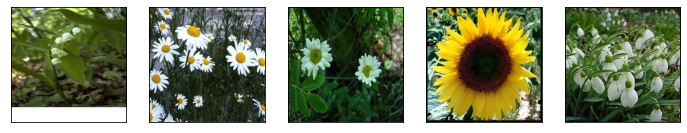

In [ ]:
from random import randint
plt.figure(figsize=(12,12)) # plot 5 images
for i in range(5):
    value = randint(0,1360)
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[value],cmap=plt.cm.binary)

In [ ]:
import random
import cv2

# Original Image
img_org = random.choice(X)

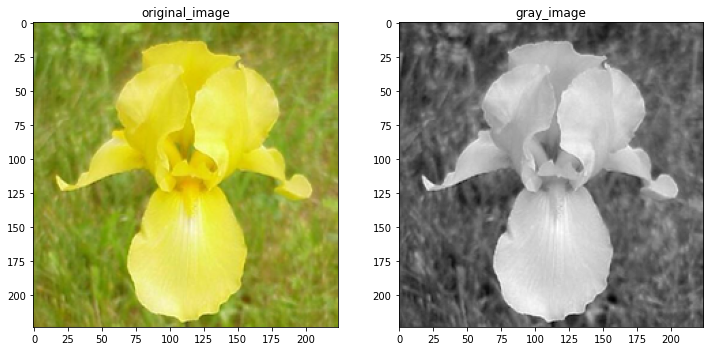

In [ ]:
# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)
img_title = ['original_image', 'gray_image']
plt.figure(figsize=(12,12))
for i,img in enumerate([img_org, gray_image]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])    
    plt.imshow(img,cmap='gray')

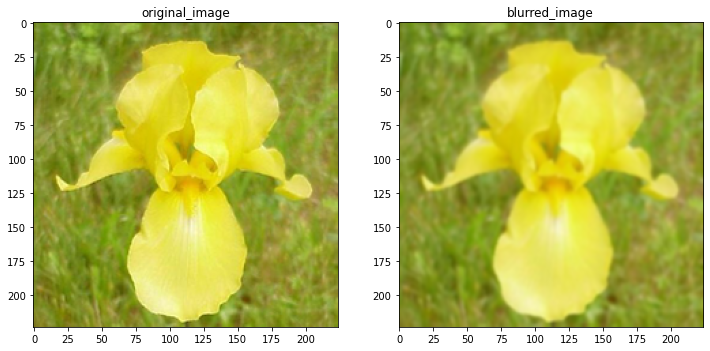

In [ ]:

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

img_title = ['original_image', 'blurred_image']

plt.figure(figsize=(12, 12))
for i,img in enumerate([img_org, blur_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

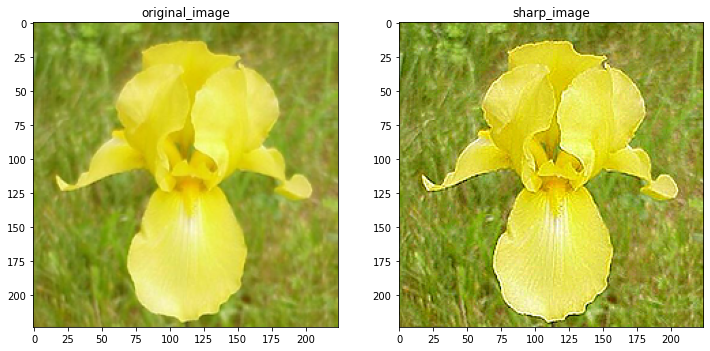

In [ ]:
# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image', 'sharp_image']

plt.figure(figsize=(12,12))
for i,img in enumerate([img_org, sharp_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

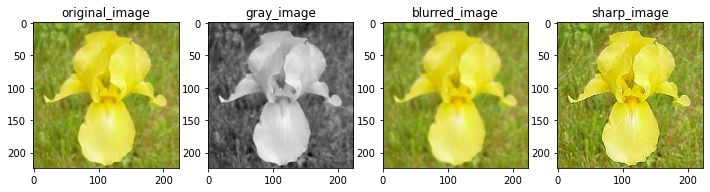

In [ ]:

img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(12,12))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

In [ ]:
def transform_image(img, filter):
    if (filter == 'BLUR'):
        filtered_img = img.filter(ImageFilter.BLUR)
        x_label = 'Blured'
    elif (filter == 'SHARPEN'):
        filtered_img = img.filter(ImageFilter.SHARPEN)
        x_label = 'Sharpened'    
    
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(2,2,1)
    plt.imshow(np.asarray(img))
    plt.xlabel('Original')
    plt.subplot(2,2,2)
    plt.imshow(np.asarray(filtered_img))
    plt.xlabel(x_label)

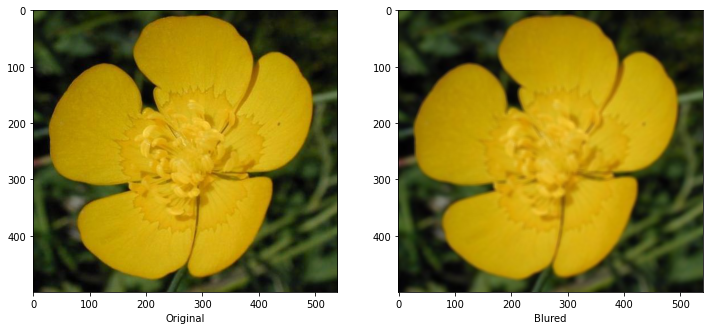

In [ ]:
img = Image.open('/content/17flowers/jpg/14/image_1121.jpg')
transform_image(img, 'BLUR')

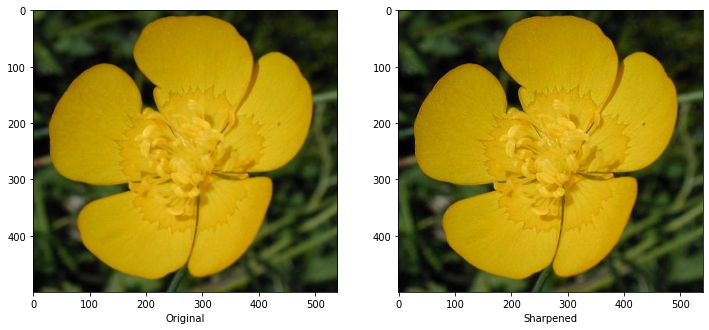

In [ ]:
transform_image(img, 'SHARPEN')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Reshaping the train and test data as per the SL model requirement

X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], 150528) # 224X224X3 = 150528
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 150528)
X_test_ML = X_test_ML/255

#y_train_ML = y_train.reshape(y_train.shape[0], 1)
#y_test_ML = y_test.reshape(y_test.shape[0], 1)


print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (1088, 150528) (1088,)
Test_Shape: (272, 150528) (272,)


In [ ]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogR = LogisticRegression()
LogR.fit(X_train_ML, y_train)

y_pred_lrt=LogR.predict(X_train_ML)
LogR_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred_lrt)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred_lrte = LogR.predict(X_test_ML)
LogR_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred_lrte)
print("Test Accuracy : ", LogR_Accuracy_Test)

Train Accuracy :  0.5202205882352942
Test Accuracy :  0.3786764705882353


In [ ]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [ ]:
### define model

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))
    
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
histroy = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=30, batch_size=8, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - ETA: 0s - loss: 2.8304 - acc: 0.1131

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 36s 33ms/sample - loss: 2.8304 - acc: 0.1131 - val_loss: 2.8044 - val_acc: 0.0993
Epoch 2/30
1088/1088 [==============================] - 35s 32ms/sample - loss: 2.5727 - acc: 0.1801 - val_loss: 2.7659 - val_acc: 0.0772
Epoch 3/30
1088/1088 [==============================] - 35s 32ms/sample - loss: 2.3529 - acc: 0.2344 - val_loss: 2.7496 - val_acc: 0.0846
Epoch 4/30
1088/1088 [==============================] - 35s 32ms/sample - loss: 2.2097 - acc: 0.2812 - val_loss: 2.3262 - val_acc: 0.2390
Epoch 5/30
1088/1088 [==============================] - 36s 33ms/sample - loss: 2.0935 - acc: 0.2978 - val_loss: 2.1172 - val_acc: 0.2794
Epoch 6/30
1088/1088 [==============================] - 35s 32ms/sample - loss: 1.9606 - acc: 0.3438 - val_loss: 1.9928 - val_acc: 0.3529
Epoch 7/30
1088/1088 [==============================] - 35s 32ms/sample - loss: 1.8946 - acc: 0.3566 - val_loss: 1.9514 - val_acc: 0.3309
Epoch 8/30
1088/1088 [=======================

In [ ]:
histroy
print(histroy.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0.5, 1.0, 'Training and validation loss')

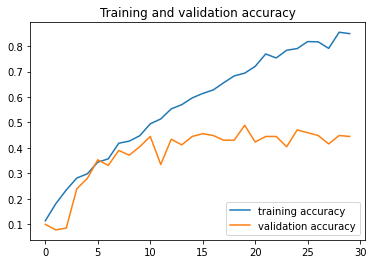

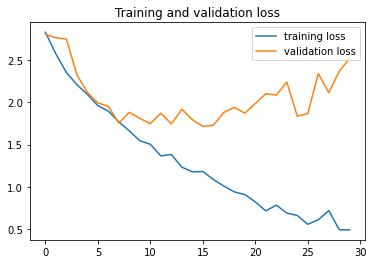

In [ ]:
## Accuracy and Loss plots

accuracy      = histroy.history['acc']
val_accuracy  = histroy.history['val_acc']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
train_X = X_train.astype('float32')
train_X = train_X.reshape(train_X.shape[0],224,224,3)
train_X = train_X / 255.

test_X = X_test.astype('float32')
test_X = test_X.reshape(test_X.shape[0], 224,224,3)
test_X = test_X / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape) # TEST


Training data :  (1088, 224, 224, 3)

Testing data :  (272, 224, 224, 3)


In [ ]:
cnn_batch_size = 32
cnn_epochs = 25
num_classes = 17

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (224, 224, 3)))

cnn.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
cnn.add(MaxPooling2D(pool_size = 3))


cnn.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = 3))

cnn.add(Convolution2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = 3))


cnn.add(Flatten()) 

# fully connected layer
cnn.add(Dense(units = 64,activation = 'relu'))
cnn.add(Dense(units = 32,activation = 'relu'))
cnn.add(Dense(units = 16,activation = 'relu'))

# Classification layer
cnn.add(Dense(units = 17, activation = 'softmax')) 

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 224, 224, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                        

In [ ]:
MODEL1=cnn.fit(train_X, y_train, epochs = 15, validation_data = (test_X, y_test))

Train on 1088 samples, validate on 272 samples
Epoch 1/15
1088/1088 [==============================] - ETA: 0s - loss: 2.8205 - acc: 0.0772

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 78s 72ms/sample - loss: 2.8205 - acc: 0.0772 - val_loss: 2.8373 - val_acc: 0.0588
Epoch 2/15
1088/1088 [==============================] - 77s 70ms/sample - loss: 2.6434 - acc: 0.1232 - val_loss: 2.8295 - val_acc: 0.0772
Epoch 3/15
1088/1088 [==============================] - 75s 69ms/sample - loss: 2.3417 - acc: 0.1939 - val_loss: 2.8033 - val_acc: 0.0846
Epoch 4/15
1088/1088 [==============================] - 75s 69ms/sample - loss: 2.0958 - acc: 0.3006 - val_loss: 2.7954 - val_acc: 0.0735
Epoch 5/15
1088/1088 [==============================] - 76s 70ms/sample - loss: 1.9408 - acc: 0.3502 - val_loss: 2.9337 - val_acc: 0.1176
Epoch 6/15
1088/1088 [==============================] - 75s 69ms/sample - loss: 1.7663 - acc: 0.4191 - val_loss: 2.9976 - val_acc: 0.0662
Epoch 7/15
1088/1088 [==============================] - 75s 69ms/sample - loss: 1.6553 - acc: 0.4320 - val_loss: 3.3637 - val_acc: 0.0588
Epoch 8/15
1088/1088 [=======================